In [5]:
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
from cuda_with_launcher import *
import numpy as np

In [6]:
from cuda_with_launcher.geoplot import *

In [7]:
world = read_geo_frame()
world = update_geo_frame(world)

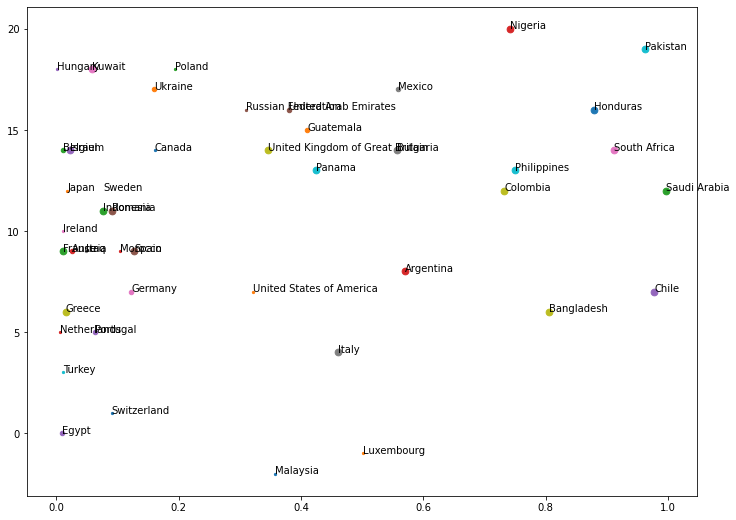

In [33]:
fig, ax = plt.subplots(figsize=(12,9))    
ax.tick_params(left=True,
                bottom=True,
                labelleft=True,
                labelbottom=True)
    
x = 'permeability'
y = 'offset'

all_countries = get_all_countries()
for index, row in world.iterrows():
    if not np.isnan(row[y]):
        if row['name'] in all_countries:
            
            config = configuration.read_configuration(row['name'], prefix='used/', sufix='')
            # if config["score"]<3:
            #     continue
            ax.scatter(row[x], row[y], s=5*config["score"]**2)
            ax.annotate(row["name"], (row[x], row[y]))
        